## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [12]:
import os
import keras
from keras.regularizers import l1, l2, l1_l2
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

#### L1

In [9]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [13]:
results = {}
"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 74us/step - loss: 5.9981 - acc: 0.2725 - val_loss: 5.7987 - val_acc: 0.3529
Epoch 2/50
50000/50000 [==============================] - 3s 66us/step - loss: 5.7145 - acc: 0.3675 - val_loss: 5.6280 - val_acc: 0.3928
Epoch 3/50
50000/50000 [==============================] - 3s 64us/step - loss: 5.5642 - acc: 0.3981 - val_loss: 5.5005 - val_acc: 0.4066
Epoch 4/50
50000/50000 [==============================] - 3s 65us/step - loss: 5.4417 - acc: 0.4171 - val_loss: 5.3853 - val_acc: 0.4279
Epoch 5/50
50000/50000 [==============================] - 3s 66us/step - loss: 5.3322 - acc: 0.4356 - val_loss: 5.2909 - val_acc: 0.4334
Epoch 6/50
50000/50000 [==============================] - 3s 65us/step - loss: 5.2323 - acc: 0.4464 - val_loss: 5.2055 - val_acc: 0.4471
Epoch 7/50
50000/50000 [==============================] - 3s 65us/step - loss: 5.1379 - acc: 0.4586 - val_loss: 5.1180 - val_acc

50000/50000 [==============================] - 3s 66us/step - loss: 1.7901 - acc: 0.3716 - val_loss: 1.7427 - val_acc: 0.3869
Epoch 3/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.7093 - acc: 0.3986 - val_loss: 1.6744 - val_acc: 0.4152
Epoch 4/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.6526 - acc: 0.4189 - val_loss: 1.6449 - val_acc: 0.4195
Epoch 5/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.6086 - acc: 0.4361 - val_loss: 1.5936 - val_acc: 0.4447
Epoch 6/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.5692 - acc: 0.4480 - val_loss: 1.5688 - val_acc: 0.4456
Epoch 7/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.5377 - acc: 0.4618 - val_loss: 1.5355 - val_acc: 0.4581
Epoch 8/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.5073 - acc: 0.4726 - val_loss: 1.5225 - val_acc: 0.4604
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 3s 61us/step - loss: 1.7114 - acc: 0.4019 - val_loss: 1.6985 - val_acc: 0.4073
Epoch 4/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.6540 - acc: 0.4228 - val_loss: 1.6325 - val_acc: 0.4208
Epoch 5/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6065 - acc: 0.4375 - val_loss: 1.5939 - val_acc: 0.4406
Epoch 6/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.5665 - acc: 0.4513 - val_loss: 1.5692 - val_acc: 0.4440
Epoch 7/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.5326 - acc: 0.4622 - val_loss: 1.5441 - val_acc: 0.4455
Epoch 8/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.5014 - acc: 0.4744 - val_loss: 1.5188 - val_acc: 0.4653
Epoch 9/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4752 - acc: 0.4817 - val_loss: 1.4899 - val_acc: 0.4784
Epoch 10/50
50000/50000 [===========================

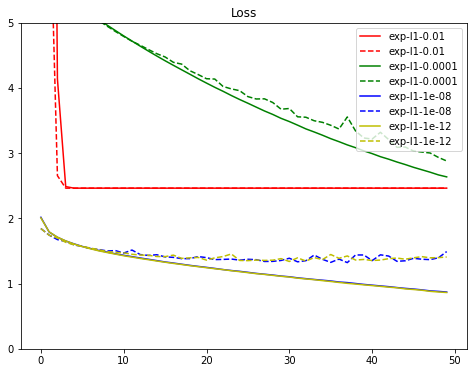

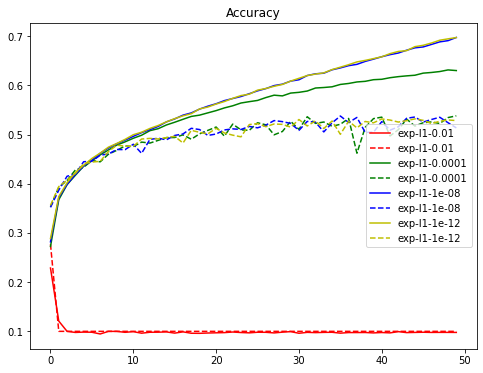

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### L1_L2

In [15]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4, l2_ratio = 1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [16]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-8]
L2_EXP = [1e-2, 1e-8]

In [18]:
results = {}
for regulizer_ratio1 in L1_EXP:
    for regulizer_ratio2 in L2_EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with Regulizer1 = %.6f, Regulizer2 = %.6f" % (regulizer_ratio1, regulizer_ratio2))
        model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio1, l2_ratio=regulizer_ratio2)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-l1-%s-l2-%s" % (str(regulizer_ratio1), str(regulizer_ratio2))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with Regulizer1 = 0.010000, Regulizer2 = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/5000

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 83us/step - loss: 198.7228 - acc: 0.2404 - val_loss: 41.1339 - val_acc: 0.2718
Epoch 2/50
50000/50000 [==============================] - 4s 71us/step - loss: 19.1109 - acc: 0.1197 - val_loss: 7.2851 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 4s 70us/step - loss: 4.1109 - acc: 0.0989 - val_loss: 2.6471 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.4858 - acc: 0.0996 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.4626 - acc: 0.0953 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 70us/step - loss: 2.4626 - acc: 0.0988 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 4s 70us/step - loss: 2.4626 - acc: 0.0984 - val_loss: 2.4625 - val

50000/50000 [==============================] - 4s 80us/step - loss: 15.0976 - acc: 0.2714 - val_loss: 13.9725 - val_acc: 0.3196
Epoch 2/50
50000/50000 [==============================] - 3s 70us/step - loss: 13.0344 - acc: 0.3524 - val_loss: 12.1399 - val_acc: 0.3665
Epoch 3/50
50000/50000 [==============================] - 3s 70us/step - loss: 11.3572 - acc: 0.3770 - val_loss: 10.6091 - val_acc: 0.3833
Epoch 4/50
50000/50000 [==============================] - 3s 70us/step - loss: 9.9432 - acc: 0.3930 - val_loss: 9.3074 - val_acc: 0.3926
Epoch 5/50
50000/50000 [==============================] - 3s 70us/step - loss: 8.7425 - acc: 0.4013 - val_loss: 8.1990 - val_acc: 0.4025
Epoch 6/50
50000/50000 [==============================] - 3s 70us/step - loss: 7.7199 - acc: 0.4103 - val_loss: 7.2696 - val_acc: 0.4025
Epoch 7/50
50000/50000 [==============================] - 3s 70us/step - loss: 6.8484 - acc: 0.4155 - val_loss: 6.4538 - val_acc: 0.4186
Epoch 8/50
50000/50000 [======================

50000/50000 [==============================] - 4s 70us/step - loss: 1.7980 - acc: 0.3679 - val_loss: 1.7499 - val_acc: 0.3835
Epoch 3/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.7146 - acc: 0.3985 - val_loss: 1.6876 - val_acc: 0.4013
Epoch 4/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.6554 - acc: 0.4209 - val_loss: 1.6433 - val_acc: 0.4204
Epoch 5/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.6081 - acc: 0.4383 - val_loss: 1.6021 - val_acc: 0.4372
Epoch 6/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.5693 - acc: 0.4513 - val_loss: 1.5610 - val_acc: 0.4493
Epoch 7/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.5346 - acc: 0.4627 - val_loss: 1.5453 - val_acc: 0.4542
Epoch 8/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.5052 - acc: 0.4717 - val_loss: 1.5226 - val_acc: 0.4634
Epoch 9/50
50000/50000 [============================

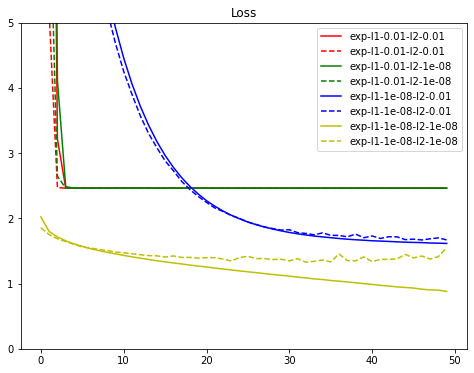

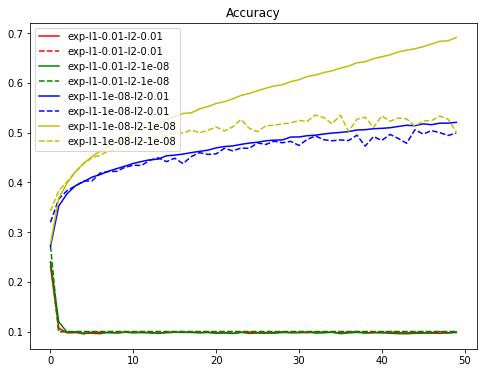

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()